# Clustering

In [91]:
import random
import itertools
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


Utility functions

In [92]:

def debug(thing, title):
    print('--------------------------------------------')
    print(title)
    print(thing)
    print('--------------------------------------------')


def display_imgs(imgs, titles):

    for ind, img in enumerate(imgs):
        print(img.shape)
        if len(img.shape) > 2:
            b,g,r = cv.split(img)
            img = cv.merge((r,g,b))
            plt.imshow(img)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(titles[ind])
        plt.show()


## K-means from scratch

--------------------------------------------
new image
[[[179 132  52]
  [157 113  30]
  [156 112  23]
  ...
  [100  55  12]
  [100  56   9]
  [100  56   9]]

 [[214 173  47]
  [226 182  66]
  [201 153  49]
  ...
  [ 99  48  31]
  [ 97  50  23]
  [ 95  48  21]]

 [[169 123  49]
  [178 135  53]
  [190 151  58]
  ...
  [103  57  34]
  [ 89  50  18]
  [ 89  50  18]]

 ...

 [[ 55  48  29]
  [ 43  35  18]
  [ 50  40  27]
  ...
  [ 58  49  40]
  [ 46  38  31]
  [ 35  28  19]]

 [[ 15   7   1]
  [ 45  38  30]
  [ 73  66  57]
  ...
  [ 12   7   4]
  [ 21  15  11]
  [ 27  24  16]]

 [[ 14   8   1]
  [ 31  25  18]
  [ 23  17  10]
  ...
  [ 10   5   2]
  [ 11   6   3]
  [ 11   6   3]]]
--------------------------------------------


/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_1138/4103540849.py:79: RuntimeWarning: overflow encountered in scalar subtract
  (b2 - b1) ** 2)) ** 0.5
/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_1138/4103540849.py:78: RuntimeWarning: overflow encountered in scalar subtract
  (g2 - g1) ** 2 +
/var/folders/3s/s_cfgxk120b8xn2g6y1m9psw0000gn/T/ipykernel_1138/4103540849.py:77: RuntimeWarning: overflow encountered in scalar subtract
  curr_dist = (((r2 - r1) ** 2 +


--------------------------------------------
rgb
25
--------------------------------------------
--------------------------------------------
rgb
140
--------------------------------------------
--------------------------------------------
rgb
119
--------------------------------------------
--------------------------------------------
new image final
[[[119.  80.  47.]
  [119.  80.  47.]
  [119.  80.  47.]
  ...
  [119.  80.  47.]
  [119.  80.  47.]
  [119.  80.  47.]]

 [[140. 115. 134.]
  [140. 115. 134.]
  [140. 115. 134.]
  ...
  [119.  80.  47.]
  [119.  80.  47.]
  [119.  80.  47.]]

 [[119.  80.  47.]
  [119.  80.  47.]
  [140. 115. 134.]
  ...
  [119.  80.  47.]
  [119.  80.  47.]
  [119.  80.  47.]]

 ...

 [[119.  80.  47.]
  [ 25.  18.  13.]
  [ 25.  18.  13.]
  ...
  [140. 115. 134.]
  [ 25.  18.  13.]
  [ 25.  18.  13.]]

 [[ 25.  18.  13.]
  [ 25.  18.  13.]
  [119.  80.  47.]
  ...
  [ 25.  18.  13.]
  [ 25.  18.  13.]
  [ 25.  18.  13.]]

 [[ 25.  18.  13.]
  [ 25.  18

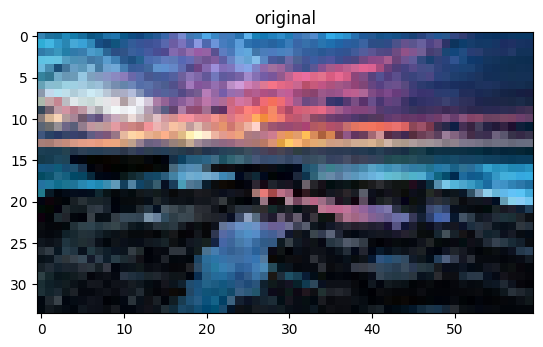

(34, 60, 3)


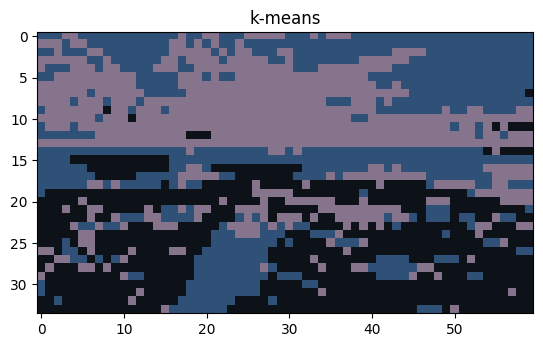

In [93]:

# Define N of clusters
# Choose N points randomly as centroids for clusters
# Compare all points against the centroids, by intensity, until we find the closest one, add them to the clusters
# Calculate new centroid
# Continue until all points have been classified


img_color_int = cv.imread('beach.jpeg')

img = cv.resize(img_color_int, (60, 34))


# img_gray_int = cv.cvtColor(img_color_int, cv.COLOR_BGR2GRAY)
# img_gray_float = np.float32(img_gray_int / 255)

# img_color_float = np.float32(img_color_int / 255)
# x, y, z = img_color_float.shape


# K-means implementation for image segmentation by hand.
n = 3

# img = np.array([
#     [[200,  200,  200],
#      [190, 180, 200]],
#      [[200, 170, 200],
#       [100, 80, 90]],
#      [[120, 90, 100],
#       [100, 120, 90]],
#       [[0, 3, 7],
#        [1, 11, 11]]])


debug(img, 'new image')

# Homework asks for the algorithm to be tailored for color images.
rows, cols, channels = img.shape

coordinates = itertools.product(list(range(rows)), list(range(cols)))
coordinates = [coordinate for coordinate in coordinates]
#debug(coordinates, 'all coordinates 2d')

# means positions
#means_pos = random.sample(coordinates, n)
#means_pos = [(0, 0), (1, 1), (3, 1)]
means_pos = [(15, 10), (10, 25), (0, 0)]

#debug(means_pos, 'initial means positions')
means =[img[x, y, :] for x, y in means_pos]
#debug(means, 'initial means')

clusters = [[mean] for mean in means]
#debug(clusters, 'initial clusters')
marked = {ind: [mean_pos] for ind, mean_pos in enumerate(means_pos)}
#debug(marked, 'initial marked')

# marked positions
marked_poses = []
for pos_list in marked.values():
    marked_poses += pos_list


while len(marked_poses) < rows * cols:
    for cluster_ind, mean in enumerate(means):
        if len(marked_poses) == rows * cols:
            break
        r1, g1, b1 = mean[0], mean[1], mean[2]
        min_dist = float('Inf')
        for i in range(rows):
            for j in range(cols):
                # My interpreation of the distance between 2 points is the
                # Euclidean distance between the intensities
                # (r2 - r1) ^ 2 + (g2 - g1) ^ 2 + (b2 - b1) ^ 2
                if (i, j) in marked_poses:
                    continue
                r2, g2, b2 = img[i, j, :]
                curr_dist = (((r2 - r1) ** 2 + 
                            (g2 - g1) ** 2 + 
                            (b2 - b1) ** 2)) ** 0.5
                if curr_dist < min_dist:
                    min_dist = curr_dist
                    # Similar point coordinate
                    spt_coordinate = (i, j)
        #debug((r1, g1, b1), 'reference point (mean value)')

        marked[cluster_ind] += [spt_coordinate]
        marked_poses = []
        for pos_list in marked.values():
            marked_poses += pos_list
        #debug(marked, 'clusters')
        #debug(marked_poses, 'positions')

        # debug(img[spt_coordinate[0], spt_coordinate[1], :], 'closest value')
        clusters[cluster_ind] += [img[spt_coordinate[0], spt_coordinate[1], :]]


    # After the closest points have been added to the clusters, we 
    # re-calculate the means
    means =  [np.average(intensity_cluster, axis=0) for intensity_cluster in clusters]
    # debug(means, 'new means')

means = [mean.astype('uint8') for mean in means]


new_img = np.zeros(img.shape)
for i in range(n):
    r, g, b = means[i]
    debug((r), 'rgb')
    # Gives me all the positions for this cluster.
    for pos in marked[i]:
        new_img[pos[0], pos[1], 0] = r
        new_img[pos[0], pos[1], 1] = g
        new_img[pos[0], pos[1], 2] = b

debug(new_img, 'new image final')
display_imgs([img, new_img.astype('uint8')], ['original', 'k-means'])

## Fuzzy c-means from scratch

--------------------------------------------
initial means
[(0, 0, 255), (255, 0, 0), (0, 255, 0)]
--------------------------------------------
--------------------------------------------
membership tensor shape
(34, 60, 3)
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
sum across clusters
1.0
--------------------------------------------
--------------------------------------------
s

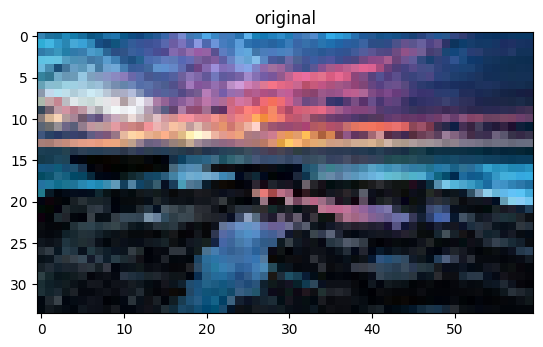

(34, 60, 3)


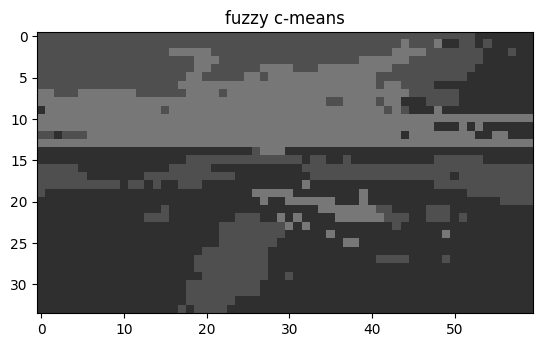

In [106]:

img_color_int = cv.imread('beach.jpeg')

img = cv.resize(img_color_int, (60, 34))


# K-means implementation for image segmentation by hand.
n = 3

# img = np.array([
#     [[200,  200,  200],
#      [190, 180, 200]],
#      [[200, 170, 200],
#       [100, 80, 90]],
#      [[120, 90, 100],
#       [100, 120, 90]],
#       [[0, 3, 7],
#        [1, 11, 11]]])


# Homework asks for the algorithm to be tailored for color images.
rows, cols, channels = img.shape

coordinates = itertools.product(list(range(rows)), list(range(cols)))
coordinates = [coordinate for coordinate in coordinates]
#debug(coordinates, 'all coordinates 2d')

# means positions
#means_pos = random.sample(coordinates, n)
#means_pos = [(0, 0), (1, 1), (3, 1)]
#means_pos = [(15, 10), (10, 26), (0, 0)]

#debug(means_pos, 'initial means positions')
#means =[img[x, y, :] for x, y in means_pos]
#debug(means, 'initial means')
means = [ (0, 0, 255), (255, 0, 0), (0, 255, 0)]
debug(means, 'initial means')

clusters = [[mean] for mean in means]
#debug(clusters, 'initial clusters')

mem = np.zeros((rows, cols, n))
debug(mem.shape, 'membership tensor shape')

for _ in range(2):
    for cluster_ind, mean1 in enumerate(means):
        perfect_matches = set()
        # Calculate fuzzy membership values for all the pixels.
        for i in range(rows):
            for j in range(cols):
                if (i, j) in perfect_matches:
                    continue
                r1, g1, b1 = img[i, j, :]
                r2, g2, b2 = mean1
                # Distance to cluster
                d2c = (((r2 - r1) ** 2 + 
                            (g2 - g1) ** 2 + 
                            (b2 - b1) ** 2)) ** 0.5
                if d2c == 0:
                    mem[i, j, cluster_ind] = 1
                    perfect_matches.add((i, j))
                    continue

                #debug(d2c, f'distance to cluster {cluster_ind} from {i}, {j}')

                #debug(((r1, g1, b1), mean1), 'Image point followed by the cluster center')
                denom = 0
                for mean2 in means:
                    r2, g2, b2 = mean2
                    # Distance to cluster 2
                    d2c2 = (((r2 - r1) ** 2 + 
                            (g2 - g1) ** 2 + 
                            (b2 - b1) ** 2)) ** 0.5

                    #debug(d2c2, 'distance to cluster 2')
                    #debug(d2c / d2c2, 'current division of distances to clusters')
                    #debug(((r1, g1, b1), mean2), 'Image point followed by the cluster center 2')
                    denom += d2c / d2c2

                mem[i, j, cluster_ind] = 1 / denom
    for i in range(rows):
        for j in range(cols):
            debug(sum(mem[i, j, :]), 'sum across clusters')

    debug(mem[15, 10, :], 'the fuzzy membership tensor 15 10 should be 0')
    debug(mem[10, 26, :], 'the fuzzy membership tensor 10 26 should be 1')
    debug(mem[0, 0, :], 'the fuzzy membership tensor 0 0 should be 2')
    debug(np.linalg.norm(mem), 'norm of mem tensor')
    
    for cluster_ind, mean1 in enumerate(means):
        # After the fuzzy membership has been calculated, we re-calculate the centers.
        num = 0
        denom = 0
        for i in range(rows):
            for j in range(cols):
                num += mem[i, j, cluster_ind] * img[i, j, :]
                denom += mem[i, j, cluster_ind]
        debug(num, 'num for centers')
        debug(denom, 'denom for centers')
        new_mean = np.array(num / denom)
        means[cluster_ind] = new_mean
    debug(means, 'new means')

means = [mean.astype('uint8') for mean in means]
debug(means, 'means')

new_img = np.zeros(img.shape)

# Since each point has 3 separate membership values right one each cluster, how can I 
# color the points
for i in range(rows):
    for j in range(cols):
        max_membership = float('-Inf')
        cluster_ind = None
        for cluster_ind in range(n):
            curr_mem = mem[i, j, cluster_ind]
            if curr_mem > max_membership:
                max_membership = curr_mem
                # Max membership cluster
                max_mcluster = cluster_ind
            new_img[i, j, :] = mean[max_mcluster]
            #debug(mem[i, j, cluster_ind] * np.array(used_colors[cluster_ind]), 'color times belonging intensity')
#debug(new_img, 'new image')

display_imgs([img, new_img.astype('uint8')], ['original', 'fuzzy c-means'])

Interesting thing, different between k-means and fuzzy c-means, is that the k-means seems to preserve color a little bit more, while the fuzzy c-means tries to bring the cluster colors as